# Linear Regression from Scratch

Full explanation [here](https://jeppbautista.wordpress.com/2019/01/26/theory-to-application-linear-regression-from-scratch-using-python/)

In [ ]:
# import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

In [4]:
# b0 - Intercept
def intercept(X, Y, b1): 
    x_ = np.mean(X)
    y_ = np.mean(Y)
     
    return y_-b1*x_

# b1 - Slope
def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)
     
    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])
     
    return rise / run

## EDA

In [6]:
data = pd.read_csv("../inputs/Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
print("Dataset size") 
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 205 Columns 26


In [8]:
try:
    data[['price']] = data[['price']].astype(int)
except ValueError:
    print("Trying out the line of code above will result to this error:\n")
    print("Value Error: invalid literal for int() with base 10: '?'")

Trying out the line of code above will result to this error:

Value Error: invalid literal for int() with base 10: '?'


In [9]:
data['price'].value_counts()[:5]

?       4
9279    2
7775    2
8921    2
6692    2
Name: price, dtype: int64

In [10]:
data = data.loc[data['price']!='?']
data[['price']] = data[['price']].astype(int)

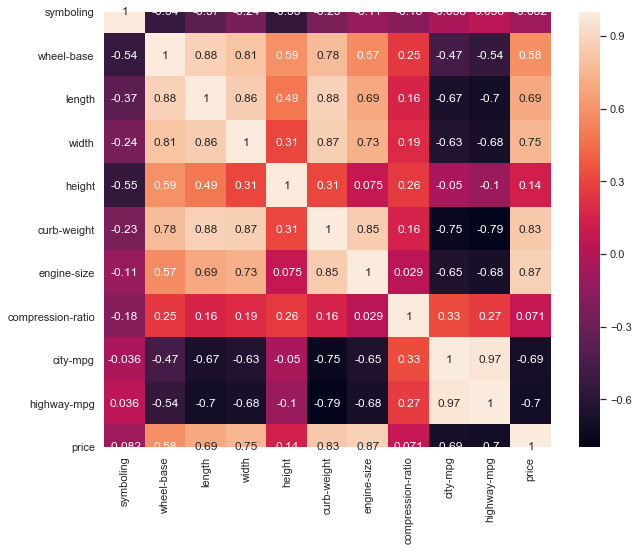

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
final_data = data[['engine-size', 'price']] 
predictor = data['engine-size'] 
target = data['price']

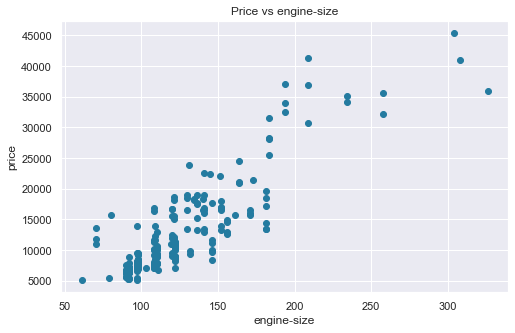

In [13]:
plt.figure(figsize=(8,5))
plt.title("Price vs engine-size")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

## Prediction

In [14]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)

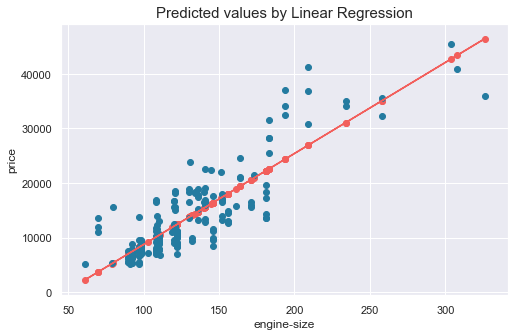

In [15]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [16]:
print("Coefficients:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  -7963.338906281075
b1 :  166.8600156914162
